### Imports

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

### Fama-French monthly

In [15]:
FF4 = pd.read_csv('FF4F_monthly.csv')
FF4 = FF4.drop(columns=['Unnamed: 0'])
# Rename date column
FF4.rename(columns={'ym': 'date'}, inplace=True)

# Convert to datetime (simple, no special format needed)
FF4['date'] = pd.to_datetime(FF4['date'], errors='coerce')

# Filter after 1996-12-31
FF4 = FF4[FF4['date'] > '1995-12-31']

FF4.set_index('date', inplace=True)  # optional, makes time-series ops easier

window = 12

# Rolling daily volatility (std of excess market return)
FF4['rolling_vol_daily'] = FF4['rm_rf'].rolling(window).std()

# Annualized volatility
FF4['rolling_vol_annualized'] = FF4['rolling_vol_daily'] * np.sqrt(12)

# Optional: percentage representation
FF4['rolling_vol_annualized_pct'] = (FF4['rolling_vol_annualized'] * 100).round(2)

# Inspect last rows
sharpe_ratio =np.sqrt(12)*FF4['rm_rf'].mean()/FF4['rm_rf'].std()

print(sharpe_ratio)
print(FF4)

0.583801604998954
                  rm        rf     rm_rf    smb_ew    hml_ew    mom_ew  \
date                                                                     
1996-01-01  0.017510  0.007414  0.010096 -0.001350 -0.004615 -0.051020   
1996-02-01  0.056440  0.006332  0.050108 -0.033147  0.000761 -0.015564   
1996-03-01  0.017373  0.006407  0.010966  0.010563 -0.013056 -0.020489   
1996-04-01  0.028883  0.005817  0.023066 -0.022128 -0.001605 -0.038685   
1996-05-01  0.040286  0.005356  0.034929  0.041971 -0.027105  0.065733   
...              ...       ...       ...       ...       ...       ...   
2019-08-01 -0.011653  0.000000 -0.011653 -0.033245  0.028260 -0.019430   
2019-09-01  0.029188  0.000000  0.029188 -0.004670  0.007459 -0.022531   
2019-10-01  0.039770  0.000000  0.039770 -0.020473  0.005680 -0.032619   
2019-11-01  0.019694  0.000000  0.019694 -0.020406  0.004411 -0.011274   
2019-12-01  0.034691  0.000000  0.034691 -0.024300  0.010840  0.019382   

              smb_v

/var/folders/1f/lczv_n1n1y19m0kx5q4l54840000gn/T/ipykernel_13287/3570637153.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  FF4['date'] = pd.to_datetime(FF4['date'], errors='coerce')


### Inflation rate. Calculated based on change in CPIF

In [13]:
cpif = pd.read_csv("cpif_monthly_data.csv")
cpif['date'] = pd.to_datetime(cpif['month'], format='%YM%m')
cpif['inflation_yoy'] = cpif['value'].pct_change(periods=12) * 100

cpif.set_index('date', inplace=True)


### Macro variables

In [20]:
macro_variables = FF4.merge(cpif, left_index=True, right_index=True, how='inner')
#macro_variables.index = macro_variables.index.to_period('M')

macro_variables = macro_variables[macro_variables.index > '1996-12-31']
macro_variables.to_csv('macro_variables.csv', index=True, encoding = 'utf-8' )

### Stock data

In [4]:
df = pd.read_csv('ptrees_final_dataset.csv')
df['yearmonth'] = pd.to_datetime(df['date']).dt.to_period('M')

df

,id,isin,ticker,name,marketname,currency,date,price,volume,book_value,...,gross_profitability,capex_to_assets,debt_to_equity,sales_growth,cfo_to_assets,asset_quality,asset_growth,price_to_assets,asset_turnover,yearmonth
0,515411,CA00829Q1019,AOI.SE,Africa Oil Corp.,SSEFN,SEK,2010-09-30,10.2540,2.852158e+06,114333.352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587634,0.628753,2010-09
1,515411,CA00829Q1019,AOI.SE,Africa Oil Corp.,SSEFN,SEK,2010-10-29,12.2312,1.599629e+07,169053.716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700944,0.628753,2010-10
2,515411,CA00829Q1019,AOI.SE,Africa Oil Corp.,SSEFN,SEK,2010-11-30,12.6910,9.819007e+06,169053.716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.724660,0.628753,2010-11
3,515411,CA00829Q1019,AOI.SE,Africa Oil Corp.,SSEFN,SEK,2010-12-30,12.4151,6.635532e+06,169053.716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708849,0.628753,2010-12
4,515411,CA00829Q1019,AOI.SE,Africa Oil Corp.,SSEFN,SEK,2011-01-31,12.5071,1.270115e+07,208359.015,...,-0.092327,0.360582,12789.22201,NaN,0.175829,-0.146841,NaN,0.711485,0.628753,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102818,134624,NaN,TETY.SE,Tethys Oil AB,SSEFN,SEK,2012-12-28,27.4223,3.587609e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-12
102819,134624,NaN,TETY.SE,Tethys Oil AB,SSEFN,SEK,2013-01-31,31.2845,4.820055e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01
102820,134624,NaN,TETY.SE,Tethys Oil AB,SSEFN,SEK,2013-02-28,31.9283,4.386062e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02
102821,134624,NaN,TETY.SE,Tethys Oil AB,SSEFN,SEK,2013-03-28,32.0570,4.615139e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03


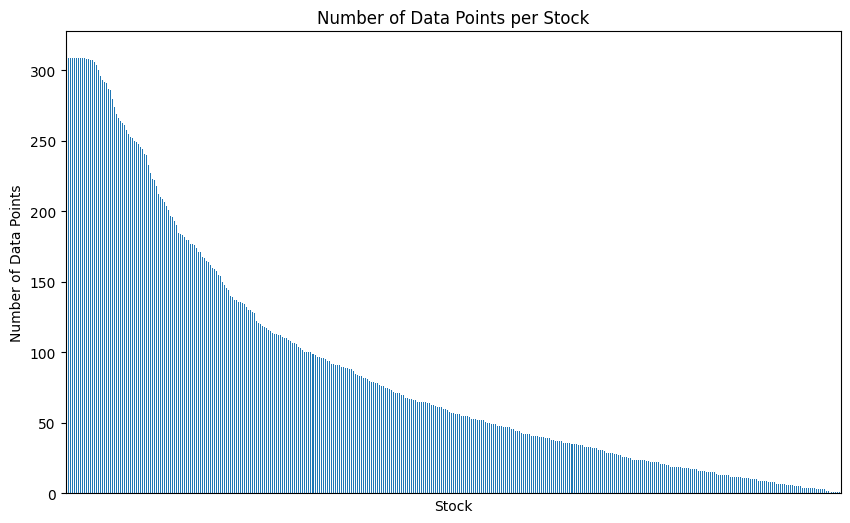

In [9]:
# Count the number of entries per stock
stock_counts = df['ticker'].value_counts()

# Plot histogram
plt.figure(figsize=(10,6))
stock_counts.plot(kind='bar')  # use 'bar' for discrete categories
plt.xlabel('Stock')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Stock')
plt.xticks([])
plt.show()